In [6]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import metrics
import pickle

import Evaluation as eva
import utils

__filename__ = 'XGboost.model'

### load data

In [ ]:
data = pd.read_csv(f'{_data_pth_}/processed/train_transaction.csv', index_col=0)
y, X = data['isFraud'], data.drop(columns=['isFraud'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=utils._random_seed_)

### configure

In [ ]:
xgb.set_config(verbosity=2)

### train


In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)
booster = xgb.train({
    'objective': 'binary:logistic', 
    'eval_metric': ['auc', 'ams@0'],
    'max_depth': 50,
    'num_parallel_tree': 5,
}, dtrain=dtrain)

### test

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_recall_curve

### Roc curve and PR curve
def roc_pr_curve(y_test, probs_predict):
    # Draw the ROC curve
    plt.figure(1)
    # ROC curve components
    fpr, tpr, thresholdsROC = roc_curve(y_test, probs_predict)
    #plot
    plt.plot(fpr,tpr)
    plt.title("ROC curve")
    plt.xlabel("1-SPEC")
    plt.ylabel("SENS")
    plt.show
    
    # Draw the PR curve
    plt.figure(2)
    # Components of the Precision recall curvey
    precision, recall, thresholdsPR = precision_recall_curve(y_test, probs_predict)
    # plot
    plt.plot(recall,precision)
    plt.title("PR curve")
    plt.xlabel("SENS (Recall)")
    plt.ylabel("PPV (Precision)")
    plt.show
    

y_pred_probs = booster.predict(dtest)
roc_pr_curve(y_test, y_pred_probs)
y_pred_probs[y_pred_probs >= 0.5] = 1
y_pred_probs[y_pred_probs < 0.5] = 0
metrics.conf_matrix(y_test, y_pred_probs)


In [ ]:
type(y_pred_probs)

## Export model

In [ ]:
# save the model to disk
pickle.dump(booster, open(f'../{utils._data_pth_}/{__filename__}', 'wb'))

## Evaluation

Test data
[[4779, 187990], [98, 2012]]
Misclassification error =  2110
SENS(recall)  =  0.7037255190693565
SPEC   =  0.9994789672919059
PPV(Precision)   =  0.9799056797211401
NPV   =  0.9894106377827602
F1-SCORE =  0.8191635241686664


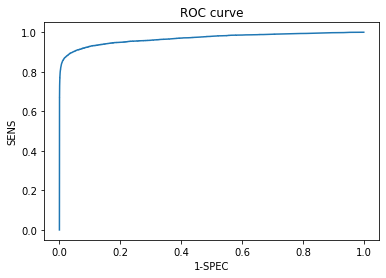

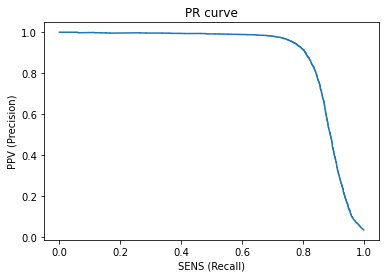

In [2]:
eva.evaluate("XGboost")